<a href="https://colab.research.google.com/github/joseira/mental_health/blob/main/Mental_health_NewDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mental Health

The project follows a structured CRISP-DM Framework, including:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
*   Define your features (X) and your target variable (y)
*   Model 1 (LR) / num features (SS) & cat features (OHE)
*   Model 2 (LR) / num features (PF) with (GSCV) & cat features(OHE)
*   Model 3 (RF) / num features(SS) & cat features(OHE)
*   Model 4 (RF) with parameters / num features(SS) & cat features(OHE)
*   Model 5 (RF) with (GSCV) / num features(SS) & cat features(OHE)
*   Model 6 (XGB) /  num features(SS) & cat features(OHE)
5. Evaluation
6. Deployment

Project Contributors
This project was developed by:
Joseira Malledo

---

*(LR) Logistic Regression*
*(RF) Random Forrest*
*(XGB) XGBoost*
*(PF) PolynomialFeatures*
*(SS)Standard Scaler*
*(OHE)One Hot Encoder*
*(GSCV)GridSearchCV*


# 1- Business Understanding

This project aims to explore the question: What factors are associated with the development of a mental illness?

This question is crucial because mental health plays a fundamental role in the lives of individuals and in society as a whole. Poor mental health can negatively impact our well-being, job performance, and relationships with friends, family, and the broader community. Mental health conditions are highly prevalent, affecting hundreds of millions of people each year, with many more experiencing them at some point in their lives. It is estimated that one in three women and one in five men will experience major depression during their lifetime.

Understanding the factors linked to mental illness is essential for researchers and healthcare professionals, as it provides an additional tool for diagnosing, preventing, and treating mental health disorders. The dataset provided contains valuable information on patients, including their age, gender, occupation, country, mental health condition, severity, consultation history, stress level, sleep hours, work hours, and physical activity hours.

Answering this question is increasingly important, as it highlights the need to focus efforts on avoiding and preventing the factors that may trigger this growing global issue. If left unexamined, we risk continuing to rely solely on conventional treatments for mental illness without acknowledging the potential influence of underlying factors such as eating disorders or food intolerances—like gluten sensitivity—that may be contributing to these conditions. Without proper awareness, individuals may unknowingly consume substances harmful to their health, leading to both physical and psychological consequences

# 2- Data Understanding

###Import Libraries and Data Loading

In [42]:
#import important libraries
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import xgboost as xgb
from sklearn import preprocessing
from sklearn import metrics
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler,  PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Data Source: https://www.kaggle.com/datasets/imtkaggleteam/mental-health/data
Data1 = pd.read_csv("data/mental_health_dataset.csv")

In [44]:
df1 = pd.DataFrame(Data1)

In [45]:
df1.sample(5)

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
371,372,57,Non-binary,Engineering,Australia,Yes,NaN,Yes,Low,7.9,30,9
500,501,42,Non-binary,Other,Australia,No,Medium,Yes,Medium,4.1,53,3
839,840,49,Non-binary,Finance,India,Yes,NaN,No,Low,6.0,68,5
580,581,29,Male,Sales,India,Yes,Medium,Yes,Low,4.5,45,9
545,546,62,Male,Engineering,USA,No,Low,No,High,9.1,60,6


### Exploratory Data Analisis

In [46]:
def describe(df):


    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []


    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())


    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })

    return output

In [47]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [48]:
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df1 : Mental Health Dataset"' + color.END)
print(describe(df1))
print("\n")

"The describe table of df1 : Mental Health Dataset"
                   variable    dtype  count  unique  missing value
0                   User_ID    int64   1000    1000              0
1                       Age    int64   1000      48              0
2                    Gender   object   1000       4              0
3                Occupation   object   1000       7              0
4                   Country   object   1000       7              0
5   Mental_Health_Condition   object   1000       2              0
6                  Severity   object   1000       4            501
7      Consultation_History   object   1000       2              0
8              Stress_Level   object   1000       3              0
9               Sleep_Hours  float64   1000      61              0
10               Work_Hours    int64   1000      51              0
11  Physical_Activity_Hours    int64   1000      11              0




In [49]:
df1.shape

(1000, 12)

In [50]:
# Missing values
print(df1.isnull().sum())

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64


In [51]:
print("\nDescriptive Statistics of Numerical Variables:")
df1.describe()


Descriptive Statistics of Numerical Variables:


,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.89200,7.095600,54.621000,5.134000
std,288.819436,13.97475,1.713861,14.709035,3.081808
min,1.000000,18.00000,4.000000,30.000000,0.000000
25%,250.750000,30.00000,5.600000,42.000000,3.000000
50%,500.500000,42.00000,7.100000,55.000000,5.000000
75%,750.250000,54.00000,8.500000,67.000000,8.000000
max,1000.000000,65.00000,10.000000,80.000000,10.000000


In [52]:
print("\nDescriptive Statistics of Categorical Variables Df1")
print(df1.describe(include=['object', 'category']))


Descriptive Statistics of Categorical Variables Df1
        Gender Occupation    Country Mental_Health_Condition Severity  \
count     1000       1000       1000                    1000      499   
unique       4          7          7                       2        3   
top     Female      Other  Australia                     Yes      Low   
freq       270        161        160                     515      176   

       Consultation_History Stress_Level  
count                  1000         1000  
unique                    2            3  
top                      No         High  
freq                    505          342  


In [53]:
df1_numeric = df1.select_dtypes(include=['float64', 'int64'])

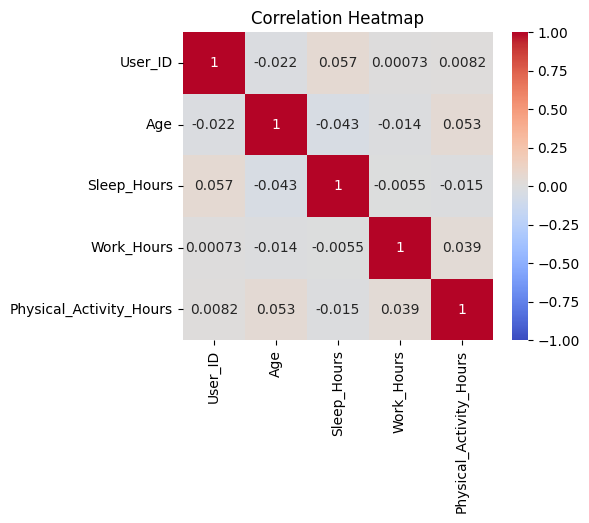

In [54]:
# Heatmap on numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(df1_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

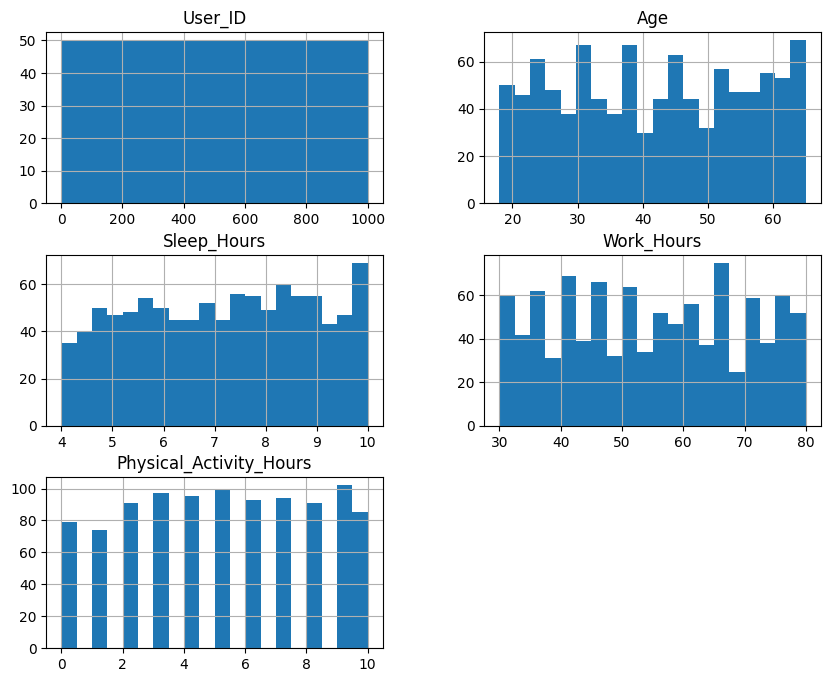

In [55]:
# Histogram for numerical variables
df1_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

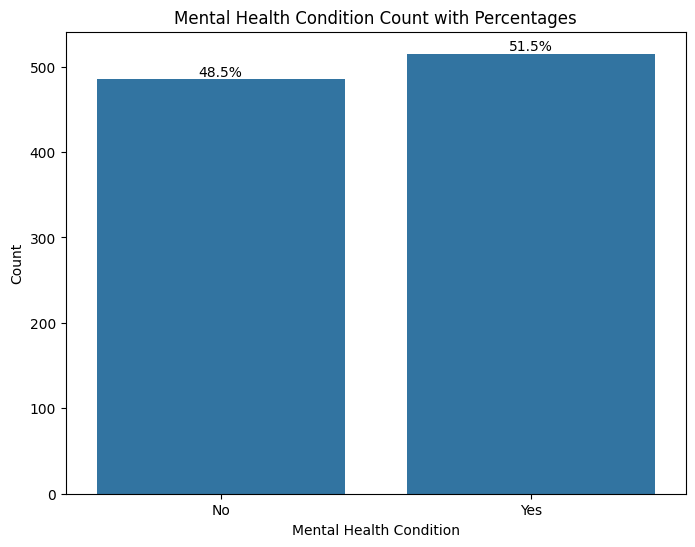

In [56]:
# Plot Mental_Health_Condition with percentages on top of each bar
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Mental_Health_Condition', data=df1)

# Calculate percentages and annotate the bars
total = len(df1)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X position for the label
    y = p.get_height()  # Y position for the label
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Mental Health Condition Count with Percentages')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()

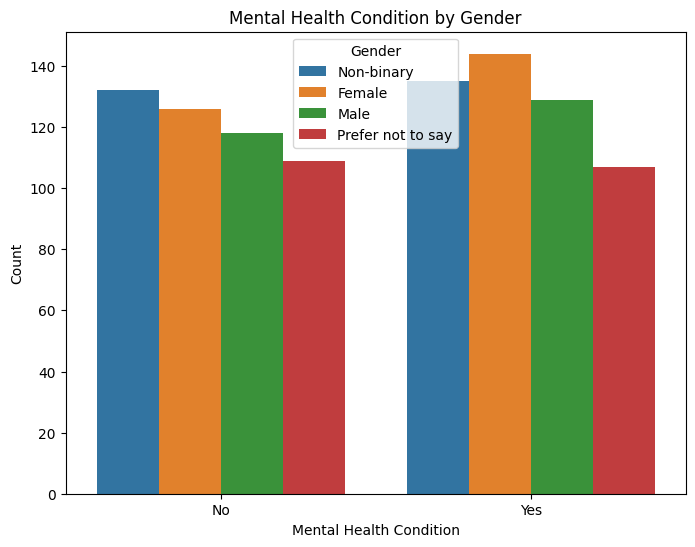

In [57]:
# Mental Health Condition by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Mental_Health_Condition', hue='Gender', data=df1)
plt.title('Mental Health Condition by Gender')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()

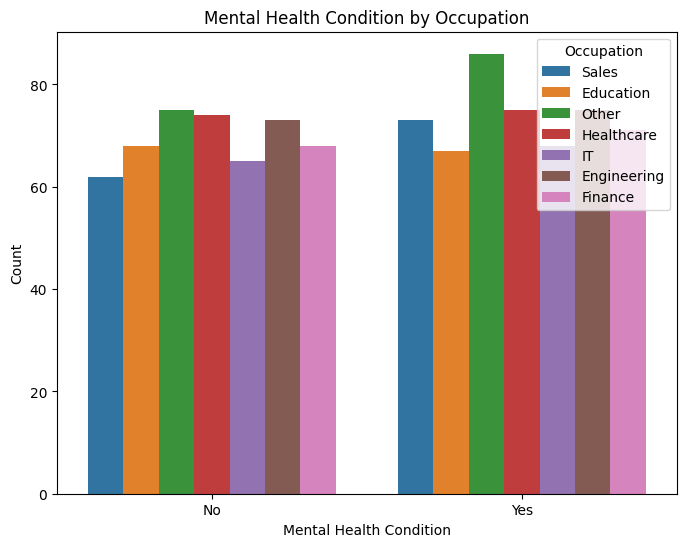

In [58]:
# Mental Health Condition by Occupation
plt.figure(figsize=(8, 6))
sns.countplot(x='Mental_Health_Condition', hue='Occupation', data=df1)
plt.title('Mental Health Condition by Occupation')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()

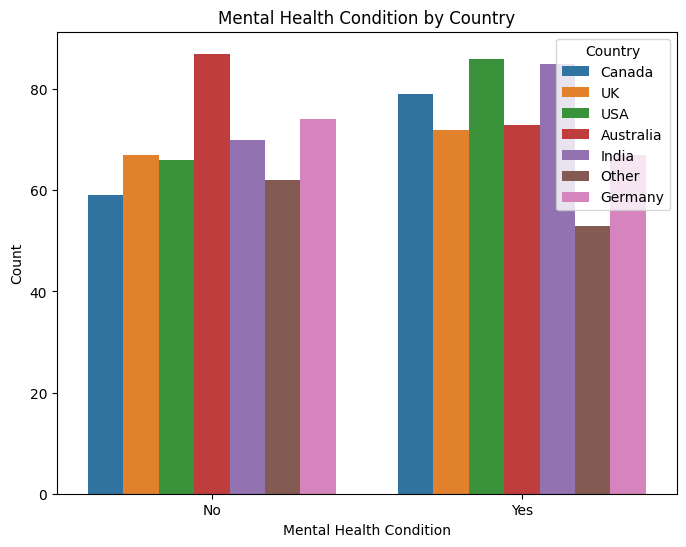

In [59]:
# Mental Health Condition by Country
plt.figure(figsize=(8, 6))
sns.countplot(x='Mental_Health_Condition', hue='Country', data=df1)
plt.title('Mental Health Condition by Country')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()

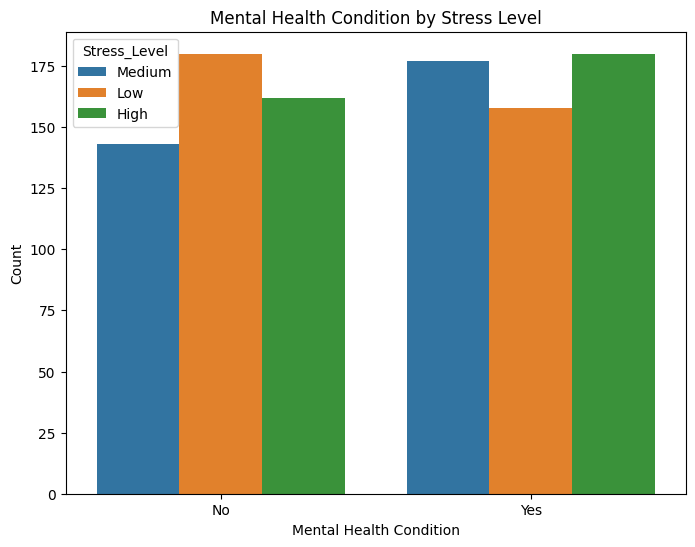

In [60]:
# Mental Health Condition by Stress_Level
plt.figure(figsize=(8, 6))
sns.countplot(x='Mental_Health_Condition', hue='Stress_Level', data=df1)
plt.title('Mental Health Condition by Stress Level')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()

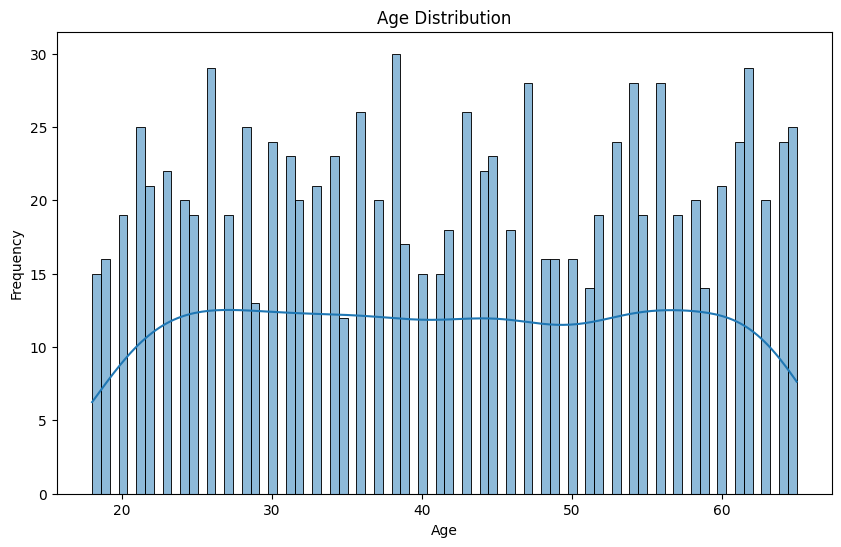

In [61]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'].dropna(), bins=80, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

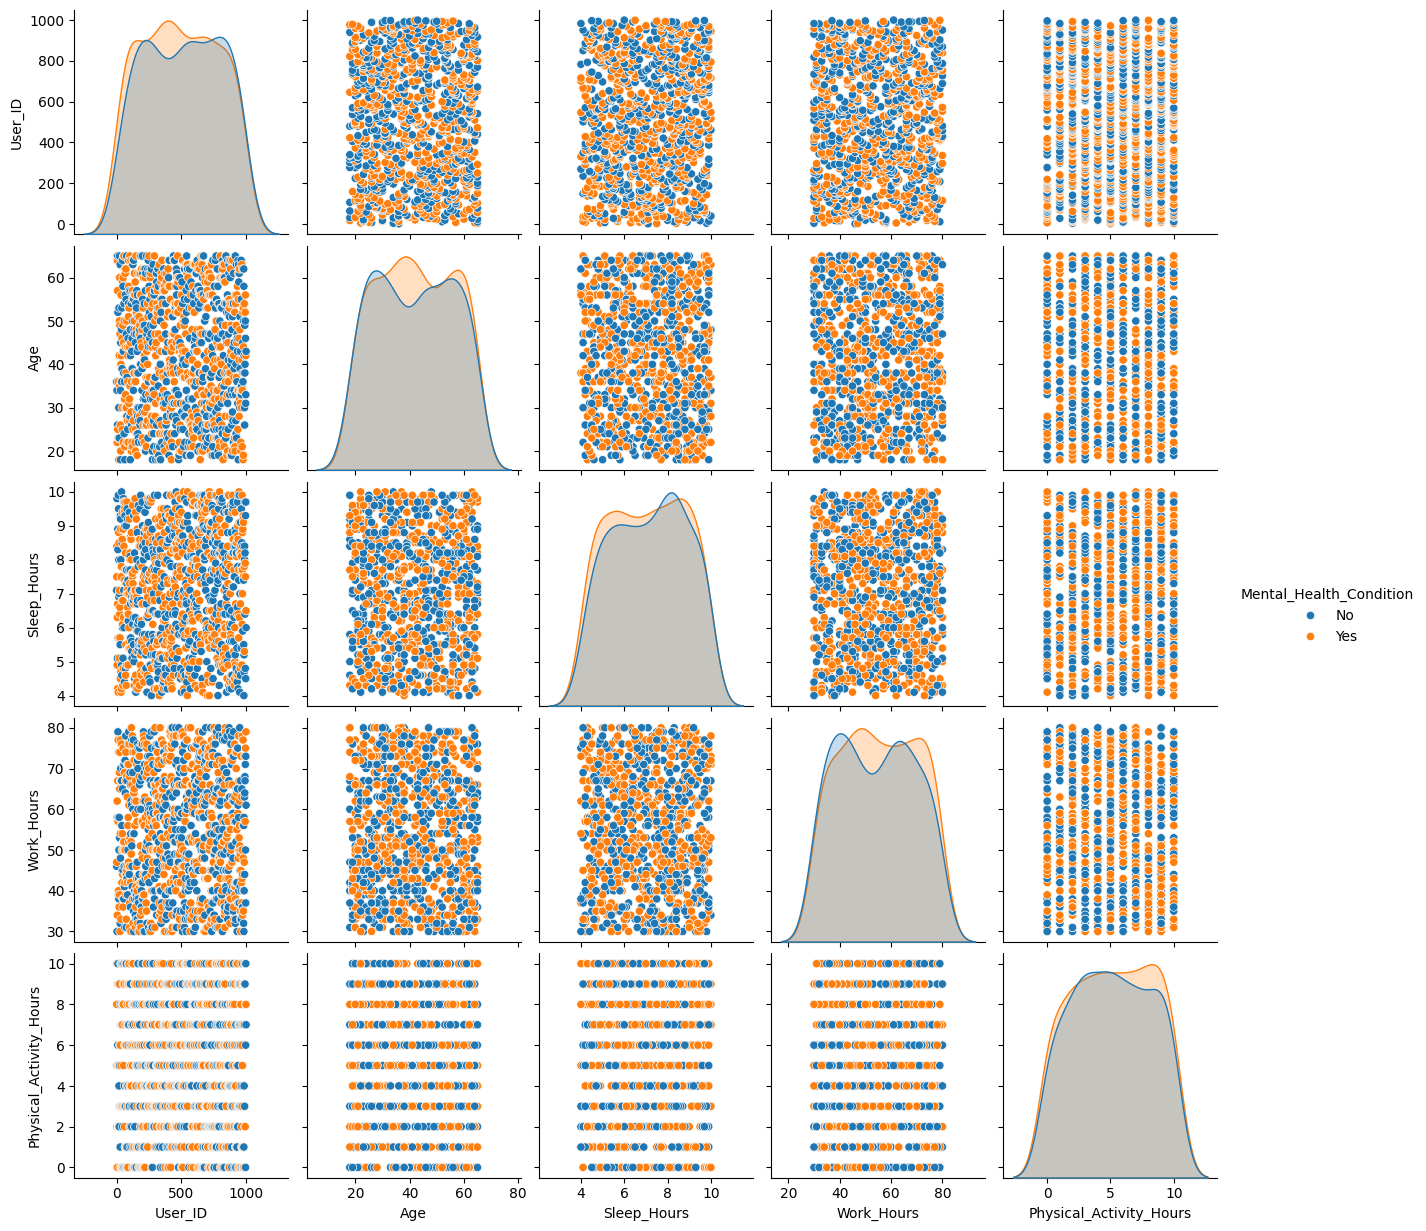

In [62]:
# Create a pairplot for all numerical variables, coloring by the 'Mental_Health_Condition' variable.
sns.pairplot(df1, hue='Mental_Health_Condition')
plt.show()

In [63]:
#Checking the relationship between Severity and Mental_Health_Condition
severity_missing = df1[df1['Severity'].isnull()]
print(f"Number of entries with missing Severity: {severity_missing.shape[0]}")
print("Mental_Health_Condition distribution in missing Severity:")
print(severity_missing['Mental_Health_Condition'].value_counts())

Number of entries with missing Severity: 501
Mental_Health_Condition distribution in missing Severity:
Mental_Health_Condition
Yes    267
No     234
Name: count, dtype: int64


#3- Data Preparation

In [64]:
useless_columns = ['Severity', 'User_ID']
df_new = df1.drop(columns=useless_columns)  # Removing non-useful columns
df_new.head()

,Age,Gender,Occupation,Country,Mental_Health_Condition,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,36,Non-binary,Sales,Canada,No,Yes,Medium,7.1,46,5
1,34,Female,Education,UK,Yes,No,Low,7.5,47,8
2,65,Non-binary,Sales,USA,Yes,No,Low,8.4,58,10
3,34,Male,Other,Australia,No,No,Medium,9.8,30,2
4,22,Female,Healthcare,Canada,Yes,No,Medium,4.9,62,5


In [65]:
df_new['Mental_Health_Condition'] = df_new['Mental_Health_Condition'].map({'Yes': 1, 'No': 0})

#4- Modeling

In [66]:
# Define which columns are categorical and which are numerical
categorical_columns = ['Gender', 'Occupation', 'Country', 'Consultation_History', 'Stress_Level']
numerical_columns = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']

In [67]:
results = []
pd.set_option('display.max_rows', None)
def run_model(name, model, X_train, X_test, y_train, y_test):
  train_time = time.time()
  model.fit(X_train, y_train)
  train_time = (time.time() - train_time)
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  train_accuracy = accuracy_score(y_train, pred_train)
  test_accuracy = accuracy_score(y_test, pred_test)
  train_recall = recall_score(y_train, pred_train)
  test_recall = recall_score(y_test, pred_test)
  train_precision = precision_score(y_train, pred_train)
  test_precision = precision_score(y_test, pred_test)
  train_f1 = f1_score(y_train, pred_train)
  test_f1 = f1_score(y_test, pred_test)
  coefs = []

  feature_names = X_train.columns.to_list()
  if hasattr(model, 'named_steps'): # For coefficients
    if 'transformer' in model.named_steps:
      transformer = model.named_steps['transformer']
      feature_names = transformer.get_feature_names_out()
      if 'logreg' in model.named_steps:
        for index, coef in enumerate(model.named_steps['logreg'].coef_[0]):
          try:
            numerical_column_index = numerical_columns.index(feature_names[index])
            if hasattr(transformer, 'standardscaler'):
              coef = coef / transformer['standardscaler'].scale_[numerical_column_index] / df[feature_names[index]].std()
          except ValueError:
            pass
          coefs.append({ 'Feature Name': feature_names[index], 'Coefficient': coef })
        display(pd.DataFrame(coefs).sort_values(by='Coefficient'))

  best_params = ''
  if hasattr(model, 'best_params_'):
    best_params = str(model.best_params_) # For GridSearchCV
    print('Best Params: ' + best_params)
  result = { 'Model': name, 'Train Time': train_time, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Train Recall': train_recall, 'Test Recall': test_recall, 'Train Precision': train_precision, 'Test Precision': test_precision, 'Train F1': train_f1, 'Test F1': test_f1, 'Best Parameters': best_params }
  results.append(result)

  if hasattr(model, 'named_steps') and 'decisiontree' in model.named_steps: # To plot the tree
    plt.figure(figsize=(20, 10))
    plot_tree(model.named_steps['decisiontree'].estimators_[0], feature_names=feature_names, filled=True, rounded=True, fontsize=10, max_depth=2)
    plt.title("Decision Tree from Random Forest")
    plt.show()


#5- Define the features (X) and the target variable (y)

In [68]:
X = df_new[numerical_columns + categorical_columns]
y = df_new['Mental_Health_Condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
print(describe(df_new))


                  variable    dtype  count  unique  missing value
0                      Age    int64   1000      48              0
1                   Gender   object   1000       4              0
2               Occupation   object   1000       7              0
3                  Country   object   1000       7              0
4  Mental_Health_Condition    int64   1000       2              0
5     Consultation_History   object   1000       2              0
6             Stress_Level   object   1000       3              0
7              Sleep_Hours  float64   1000      61              0
8               Work_Hours    int64   1000      51              0
9  Physical_Activity_Hours    int64   1000      11              0


In [70]:
# Check the size of the sets
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (800, 9). Training labels size: (800,)
Test set size: (200, 9). Test labels size: (200,)


#Model 1 Logistic Regression.
### Numerical variables Standard Scaler and Categorical Variables One Hot Encoder

In [71]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                      categorical_columns),
                                      (StandardScaler(),
                                      numerical_columns))
pipe = Pipeline([('transformer', transformer), ('logreg', LogisticRegression())])
run_model('Logistic Regression, One Hot Encoder, Standard Scaler', pipe, X_train, X_test, y_train, y_test)
display(pd.DataFrame(results))

,Feature Name,Coefficient
11,onehotencoder__Country_Australia,-0.272723
21,onehotencoder__Stress_Level_Low,-0.200897
13,onehotencoder__Country_Germany,-0.143219
15,onehotencoder__Country_Other,-0.139717
2,onehotencoder__Gender_Non-binary,-0.090462
7,onehotencoder__Occupation_Healthcare,-0.084847
5,onehotencoder__Occupation_Engineering,-0.081616
6,onehotencoder__Occupation_Finance,-0.036985
24,standardscaler__Sleep_Hours,-0.019078
9,onehotencoder__Occupation_Other,-0.000307


,Model,Train Time,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Best Parameters
0,"Logistic Regression, One Hot Encoder, Standard...",0.029233,0.56875,0.515,0.657074,0.663265,0.57563,0.503876,0.613662,0.572687,


#Model 2 Logistic Regression.
### Numerical variables Polynomial using GridSearchCV to optimized parameters and Categorical Variables One Hot Encoder

In [72]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                      categorical_columns),
                                      (PolynomialFeatures(include_bias=False),
                                      numerical_columns))
pipe = Pipeline([('transformer', transformer), ('logreg', LogisticRegression())])
grid = GridSearchCV(pipe, {'transformer__polynomialfeatures__degree': [ 1, 2, 3, 4 ]})
run_model('Logistic Regression, One Hot Encoder, Polynomial Features GSCV', grid, X_train, X_test, y_train, y_test)
display(pd.DataFrame(results))

Best Params: {'transformer__polynomialfeatures__degree': 3}


,Model,Train Time,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Best Parameters
0,"Logistic Regression, One Hot Encoder, Standard...",0.029233,0.56875,0.515,0.657074,0.663265,0.57563,0.503876,0.613662,0.572687,
1,"Logistic Regression, One Hot Encoder, Polynomi...",1.040016,0.54750,0.500,0.731415,0.673469,0.54955,0.492537,0.627572,0.568966,{'transformer__polynomialfeatures__degree': 3}


In [73]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                      categorical_columns),
                                      (PolynomialFeatures(include_bias=False, degree=3),
                                      numerical_columns))
pipe = Pipeline([('transformer', transformer), ('logreg', LogisticRegression())])
run_model('Logistic Regression, One Hot Encoder, Polynomial optimized', pipe, X_train, X_test, y_train, y_test)
display(pd.DataFrame(results))

,Feature Name,Coefficient
48,polynomialfeatures__Sleep_Hours^2 Work_Hours,-9.178395e-05
42,polynomialfeatures__Age Sleep_Hours Work_Hours,-8.346386e-05
41,polynomialfeatures__Age Sleep_Hours^2,-6.814032e-05
40,polynomialfeatures__Age^2 Physical_Activity_Hours,-5.115560e-05
47,polynomialfeatures__Sleep_Hours^3,-4.617644e-05
34,polynomialfeatures__Work_Hours^2,-2.446241e-05
54,polynomialfeatures__Work_Hours^2 Physical_Acti...,-2.180999e-05
32,polynomialfeatures__Sleep_Hours Work_Hours,-1.438171e-05
39,polynomialfeatures__Age^2 Work_Hours,-7.712266e-06
28,polynomialfeatures__Age Sleep_Hours,-6.031641e-06


,Model,Train Time,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Best Parameters
0,"Logistic Regression, One Hot Encoder, Standard...",0.029233,0.56875,0.515,0.657074,0.663265,0.57563,0.503876,0.613662,0.572687,
1,"Logistic Regression, One Hot Encoder, Polynomi...",1.040016,0.54750,0.500,0.731415,0.673469,0.54955,0.492537,0.627572,0.568966,{'transformer__polynomialfeatures__degree': 3}
2,"Logistic Regression, One Hot Encoder, Polynomi...",0.038950,0.54750,0.500,0.731415,0.673469,0.54955,0.492537,0.627572,0.568966,


#Model 3 Random Forest
### Numerical variables Standar Scaler and Categorical Variables One Hot Encoder

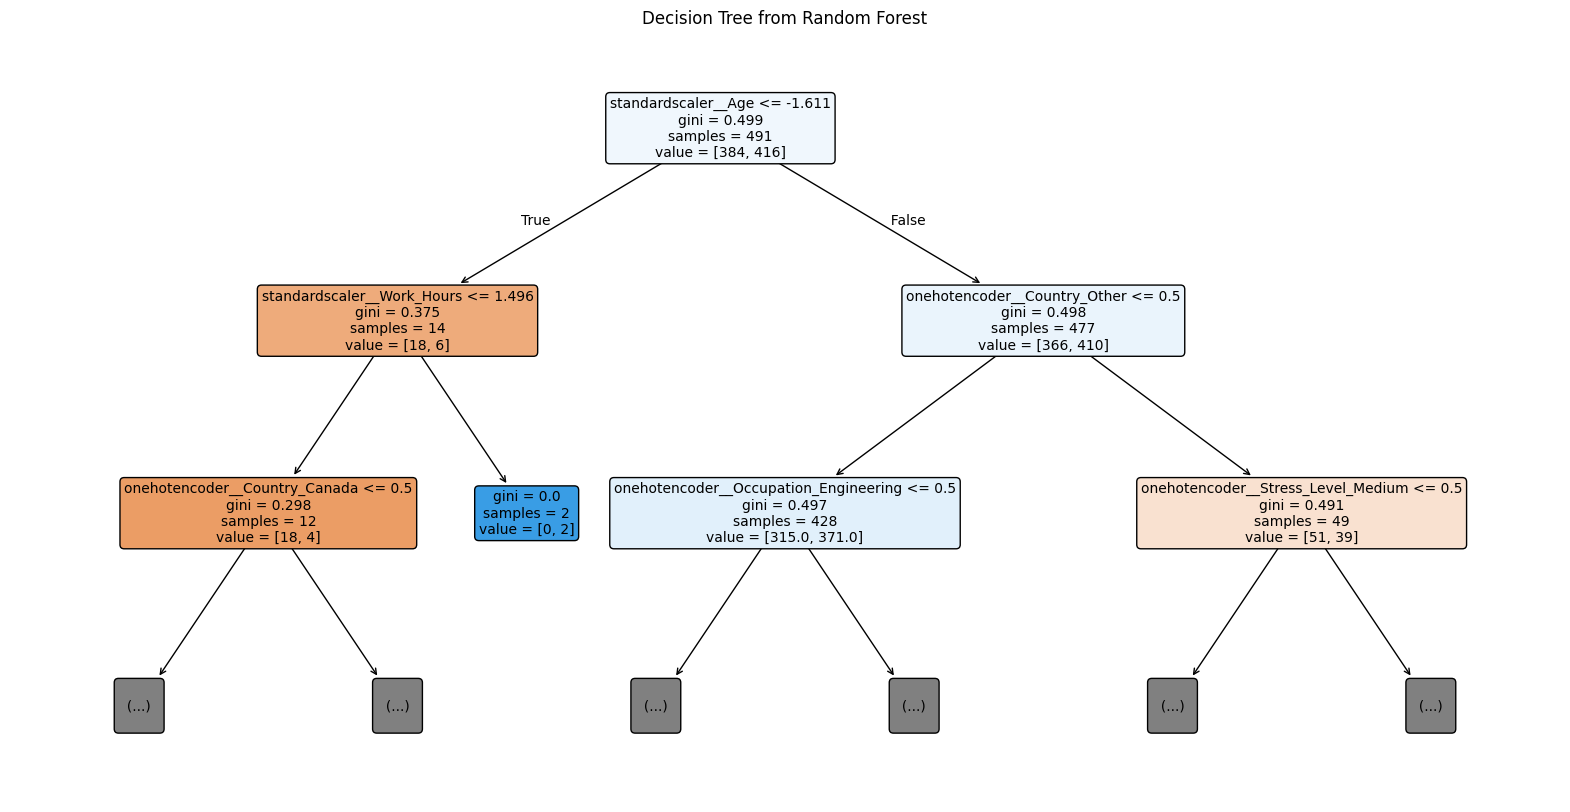

,Model,Train Time,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Best Parameters
0,"Logistic Regression, One Hot Encoder, Standard...",0.029233,0.56875,0.515,0.657074,0.663265,0.57563,0.503876,0.613662,0.572687,
1,"Logistic Regression, One Hot Encoder, Polynomi...",1.040016,0.54750,0.500,0.731415,0.673469,0.54955,0.492537,0.627572,0.568966,{'transformer__polynomialfeatures__degree': 3}
2,"Logistic Regression, One Hot Encoder, Polynomi...",0.038950,0.54750,0.500,0.731415,0.673469,0.54955,0.492537,0.627572,0.568966,
3,"Random Forest, One Hot Encoder, Standard Scaler",0.253910,1.00000,0.570,1.000000,0.622449,1.00000,0.554545,1.000000,0.586538,


In [74]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                      categorical_columns),
                                      (StandardScaler(),
                                      numerical_columns))
pipe = Pipeline([('transformer', transformer), ('decisiontree', RandomForestClassifier())])
run_model('Random Forest, One Hot Encoder, Standard Scaler', pipe, X_train, X_test, y_train, y_test)
display(pd.DataFrame(results))

#Model 4 Random Forest with parameters
### Numerical variables Standard Scaler and Categorical Variables One Hot Encoder

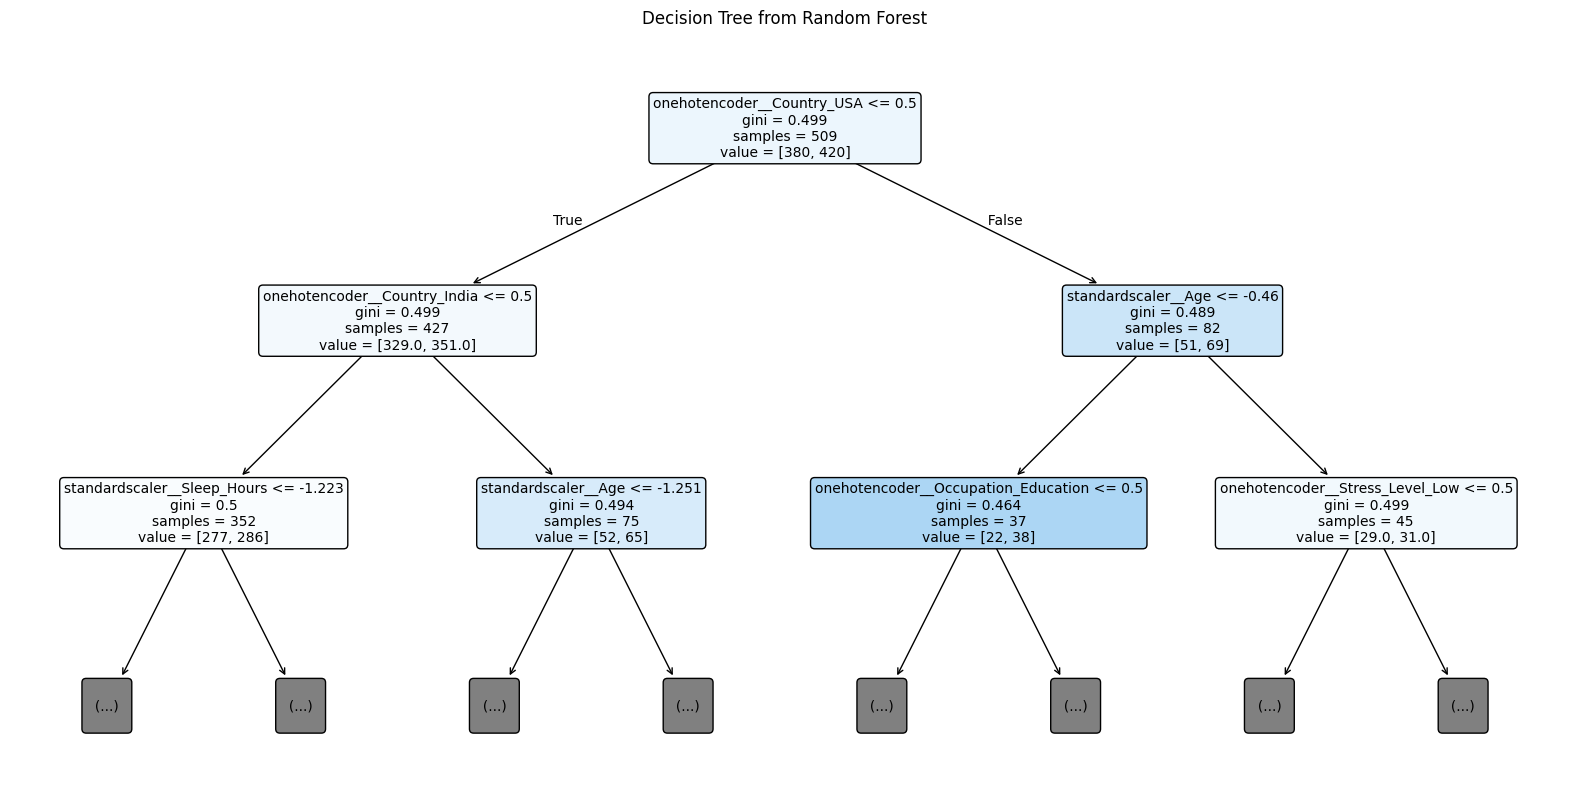

,Model,Train Time,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Best Parameters
0,"Logistic Regression, One Hot Encoder, Standard...",0.029233,0.56875,0.515,0.657074,0.663265,0.575630,0.503876,0.613662,0.572687,
1,"Logistic Regression, One Hot Encoder, Polynomi...",1.040016,0.54750,0.500,0.731415,0.673469,0.549550,0.492537,0.627572,0.568966,{'transformer__polynomialfeatures__degree': 3}
2,"Logistic Regression, One Hot Encoder, Polynomi...",0.038950,0.54750,0.500,0.731415,0.673469,0.549550,0.492537,0.627572,0.568966,
3,"Random Forest, One Hot Encoder, Standard Scaler",0.253910,1.00000,0.570,1.000000,0.622449,1.000000,0.554545,1.000000,0.586538,
4,"Random Forest max depth 5, One Hot Encoder, St...",0.037789,0.69000,0.505,0.762590,0.632653,0.680942,0.496000,0.719457,0.556054,


0.505


In [75]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                      categorical_columns),
                                      (StandardScaler(),
                                      numerical_columns))
pipe = Pipeline([('transformer', transformer), ('decisiontree', RandomForestClassifier(n_estimators=10, max_depth=5))])
run_model('Random Forest max depth 5, One Hot Encoder, Standard Scaler()', pipe, X_train, X_test, y_train, y_test)
display(pd.DataFrame(results))
print(pipe.score(X_test, y_test))

#Model 5 Random Forest optimizing with GridSearchCV
### Numerical variables Standard Scaler and Categorical Variables One Hot Encoder

In [76]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                      categorical_columns),
                                      (StandardScaler(),
                                      numerical_columns))
pipe = Pipeline([('transformer', transformer), ('decisiontree', RandomForestClassifier(n_estimators=10, max_depth=5))])
grid = GridSearchCV(pipe, { 'decisiontree__n_estimators': [10, 50, 100, 200], 'decisiontree__max_depth': [None, 10, 20], 'decisiontree__min_samples_split': [None, 2, 5] })
run_model('Random Forest GSCV, One Hot Encoder, Standard Scaler, GSCV', grid, X_train, X_test, y_train, y_test)
display(pd.DataFrame(results))

Best Params: {'decisiontree__max_depth': 10, 'decisiontree__min_samples_split': 2, 'decisiontree__n_estimators': 10}


,Model,Train Time,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Best Parameters
0,"Logistic Regression, One Hot Encoder, Standard...",0.029233,0.56875,0.515,0.657074,0.663265,0.575630,0.503876,0.613662,0.572687,
1,"Logistic Regression, One Hot Encoder, Polynomi...",1.040016,0.54750,0.500,0.731415,0.673469,0.549550,0.492537,0.627572,0.568966,{'transformer__polynomialfeatures__degree': 3}
2,"Logistic Regression, One Hot Encoder, Polynomi...",0.038950,0.54750,0.500,0.731415,0.673469,0.549550,0.492537,0.627572,0.568966,
3,"Random Forest, One Hot Encoder, Standard Scaler",0.253910,1.00000,0.570,1.000000,0.622449,1.000000,0.554545,1.000000,0.586538,
4,"Random Forest max depth 5, One Hot Encoder, St...",0.037789,0.69000,0.505,0.762590,0.632653,0.680942,0.496000,0.719457,0.556054,
5,"Random Forest GSCV, One Hot Encoder, Standard ...",27.290148,0.95125,0.480,0.954436,0.540816,0.952153,0.473214,0.953293,0.504762,"{'decisiontree__max_depth': 10, 'decisiontree_..."


#Model 6 XGBoost
### Numerical variables Standard Scaler and Categorical Variables One Hot Encoder

In [77]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                      categorical_columns),
                                      (StandardScaler(),
                                      numerical_columns))
pipe = Pipeline([('transformer', transformer), ('xgb', xgb.XGBClassifier(objective='reg:squarederror', n_estimators=10, max_depth=5))])
run_model('XGBoost, One Hot Encoder, Standard Scaler', pipe, X_train, X_test, y_train, y_test)
display(pd.DataFrame(results))

,Model,Train Time,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Best Parameters
0,"Logistic Regression, One Hot Encoder, Standard...",0.029233,0.56875,0.515,0.657074,0.663265,0.575630,0.503876,0.613662,0.572687,
1,"Logistic Regression, One Hot Encoder, Polynomi...",1.040016,0.54750,0.500,0.731415,0.673469,0.549550,0.492537,0.627572,0.568966,{'transformer__polynomialfeatures__degree': 3}
2,"Logistic Regression, One Hot Encoder, Polynomi...",0.038950,0.54750,0.500,0.731415,0.673469,0.549550,0.492537,0.627572,0.568966,
3,"Random Forest, One Hot Encoder, Standard Scaler",0.253910,1.00000,0.570,1.000000,0.622449,1.000000,0.554545,1.000000,0.586538,
4,"Random Forest max depth 5, One Hot Encoder, St...",0.037789,0.69000,0.505,0.762590,0.632653,0.680942,0.496000,0.719457,0.556054,
5,"Random Forest GSCV, One Hot Encoder, Standard ...",27.290148,0.95125,0.480,0.954436,0.540816,0.952153,0.473214,0.953293,0.504762,"{'decisiontree__max_depth': 10, 'decisiontree_..."
6,"XGBoost, One Hot Encoder, Standard Scaler",0.022359,0.84250,0.525,0.882494,0.591837,0.826966,0.513274,0.853828,0.549763,


In [78]:
pd.DataFrame(results).sort_values('Test Recall', ascending=False)

,Model,Train Time,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Best Parameters
1,"Logistic Regression, One Hot Encoder, Polynomi...",1.040016,0.54750,0.500,0.731415,0.673469,0.549550,0.492537,0.627572,0.568966,{'transformer__polynomialfeatures__degree': 3}
2,"Logistic Regression, One Hot Encoder, Polynomi...",0.038950,0.54750,0.500,0.731415,0.673469,0.549550,0.492537,0.627572,0.568966,
0,"Logistic Regression, One Hot Encoder, Standard...",0.029233,0.56875,0.515,0.657074,0.663265,0.575630,0.503876,0.613662,0.572687,
4,"Random Forest max depth 5, One Hot Encoder, St...",0.037789,0.69000,0.505,0.762590,0.632653,0.680942,0.496000,0.719457,0.556054,
3,"Random Forest, One Hot Encoder, Standard Scaler",0.253910,1.00000,0.570,1.000000,0.622449,1.000000,0.554545,1.000000,0.586538,
6,"XGBoost, One Hot Encoder, Standard Scaler",0.022359,0.84250,0.525,0.882494,0.591837,0.826966,0.513274,0.853828,0.549763,
5,"Random Forest GSCV, One Hot Encoder, Standard ...",27.290148,0.95125,0.480,0.954436,0.540816,0.952153,0.473214,0.953293,0.504762,"{'decisiontree__max_depth': 10, 'decisiontree_..."


# 5- Evaluation


We evaluated four models with numerical features (NF) scaled using MinMax Scaler, and categorical features (CF) encoded using One-Hot Encoder, analyzing R² (Coefficient of Determination):

Model 1: Linear Regression, R² = 99.21%

Model 2: Random Forest (no parameters), R² = 99.85%

Model 3: Random Forest (with max depth = 5), R² = 89.08%

Model 4: XGBoost, R² = 98.98%

Findings:
The highest R² (Coefficient of Determination) was achieved with Random Forest (Model 2). However, based on the other values, there appears to be overfitting in this model. To address this, we evaluated Model 3, a Random Forest with a reduced maximum depth of 5, but the R² worsened to 89.08%. For this reason, Linear Regression (Model 1) is considered the best option, with an R² of 99.21%. This indicates that 99.21% of the variance in the data can be explained by the model, demonstrating a very good fit.


#6. Deployment

The chosen model explains 99.21% of the variation in eating disorders based on variables such as schizophrenia, depressive disorders, anxiety disorders, bipolar disorders, country, and year. With an R² close to 1, the model provides useful insights into the factors influencing eating disorders.

According to the data, there is a close relationship between mental health conditions and eating disorders. Identifying this relationship opens the door to more in-depth investigations. For instance, surveys could help determine the connection between diet and improvements in mental health conditions.

Refining Business Knowledge for Decision-Making:
The model we identified helps explain the variation in eating disorders through mental health conditions with strong accuracy. However, there is still much more to explore in order to develop more targeted interventions—such as examining the relationship between mental health and the elimination of sugar from the diet, or the restriction of foods that may be toxic for certain individuals, like gluten. Collaborating with health researchers is crucial for identifying opportunities to expand research on how nutrition can serve as a tool to improve mental health. Understanding this connection is valuable for both researchers and healthcare professionals, as it offers an additional approach to addressing mental health disorders. By viewing dietary habits as a potential root cause, treatment strategies could go beyond traditional pharmaceutical methods and include nutritional changes as a core part of care. The dataset used provides valuable insights into conditions such as schizophrenia, anxiety, depression, and bipolar disorder.